# Exercise 2
## By: Ethan Tenison
## Date: February 14, 2020
### Revisiting the Kuznets Curve: Still a Useful Construct?
Simon Kuznets was an American economist who won the Nobel Prize in this field in 1971, for "for his empirically founded interpretation of economic growth which has led to new and deepened insight into the economic and social structure and process of development."

![Image](https://www.nobelprize.org/images/kuznets-13227-content-portrait-mobile-tiny.jpg)

The Nobel Economics web site characterizes his work as follows:

> "Simon Kuznets is best known to the public for the Kuznets curve, which describes the relationship between economic growth and inequality. However, these theories are of a later date. His prize was awarded for his earlier work with growth and the economy's size. He developed methods for calculating the size of a nation's income and changes in it and standardized the concept of gross national product (GNP). Simon Kuznets also analyzed swings in the economy's growth rate over long periods and how these were connected with population growth."

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Kuznets_curve.png/480px-Kuznets_curve.png)

> The Kuznets curve hypothesizes a long-term relationship between income inequality and per capita income that looks like an inverted U. The basic story thought to drive this is that as rural, agricultural subsistence economies develop economically, and start to urbanize rapidly, the income distribution at first grows more unequal. Eventually, as they become well-developed, modern industrial states, increased democracy and the institutions of the modern welfare state reduce inequality.

[Link to Nobel prize in economics web site page on Kuznets, with Nobel lecture](https://www.nobelprize.org/prizes/economic-sciences/1971/kuznets/lecture/)

[Link to Wikipedia entry on Kuznets curve](https://en.wikipedia.org/wiki/Kuznets_curve)

In this exercise, I am going to ask you to pick five countries with varying levels of economic development, then, using real data on income distribution, determine whether the Kuznets U-curve seems to hold as 
* (a) each individual country develops over time; and 
* (b) for the countries as a group.


> We are going to begin by grabbing data on income distribution that has been gathered together by the CORE economics team. The measure of income inequality we will use is the ***Kuznets ratio***.

* According to Wikipedia:

>The Kuznets ratio is a measurement of the ratio of income going to the highest-earning households (usually defined by the upper 20%) and the income going to the lowest-earning households, which is commonly measured by either the lowest 20% or lowest 40% of income. Comparing 20% to 20%, a completely even distribution is expressed as 1; 20% to 40% changes this value to 0.5.

>Kuznets had two similar explanations for this historical phenomenon:

>* workers migrated from agriculture to industry; and
>* rural workers moved to urban jobs.

>In both explanations, inequality will decrease after 50% of the shift force switches over to the higher paying sector.

>See Kuznets, Simon. 1955. Economic Growth and Income Inequality. *American Economic Review* 45 (March): 1–28.

I would like you to measure inequality using a Kuznets ratio defined as the ratio of the income received by the top 20% of the population (top two deciles) divided by the income received by the bottom 20% (bottom two deciles). This ratio will equal 1 if everyone receives the same per capita income, and approach infinity if the top deciles of the population receive almost all of the income.

### First, let's pull the data off the web...

#### The standard Python package imports, first thing:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


#### Now we get the data

[Always a good idea to explore what we are getting at the source](https://jackblun.github.io/Globalinc/)

This data set appears to contain mean per capita income in each of the 10 income deciles, along with mean per capita income overall, by country by year.

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/jackblun/Globalinc/master/GCIPrawdata.csv',header=2)
df.head()

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412
1,Afghanistan,1981,212,361,469,574,686,818,986,1225,1645,3655,1063,12996923
2,Afghanistan,1982,221,377,490,599,716,854,1029,1278,1717,3814,1109,12667001
3,Afghanistan,1983,238,405,527,644,771,919,1107,1376,1848,4105,1194,12279095
4,Afghanistan,1984,249,424,551,674,806,961,1157,1438,1932,4291,1248,11912510


In [16]:
df.tail()

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
4897,Zambia,2011,37,90,143,203,275,368,497,701,1104,3983,740,14343526
4898,Zambia,2012,38,94,149,210,285,381,515,726,1143,4123,766,14786581
4899,Zambia,2013,39,97,154,218,295,394,533,751,1183,4268,793,15246086
4900,Zambia,2014,40,100,158,224,303,405,548,772,1216,4387,815,15721343
4901,Zambia,2015,42,103,163,231,313,419,566,798,1257,4534,843,15808000


## Let's look at countries in 1980, sort them by mean income:

In [17]:

df80=df.loc[df.Year==1980,:]
print(df80.shape) # we have data for 133 countries
df80.sort_values('Mean Income').iloc[:50,:] # show data for bottom 50, default sort is ascending values

(133, 14)


,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
2557,Lesotho,1980,12,29,46,65,87,117,158,223,353,1348,244,1307403
912,China,1980,79,113,146,177,210,245,286,336,404,520,252,981200000
663,Burundi,1980,37,54,73,94,120,153,196,259,376,1326,269,4126544
3163,Nepal,1980,130,163,193,222,252,285,325,378,467,804,322,14890080
4304,Tanzania,1980,56,84,109,135,166,204,255,333,481,1658,348,18684893
3092,Myanmar,1980,58,99,142,187,237,295,368,468,633,1088,357,34470694
2486,Lao,1980,78,109,141,177,218,268,332,422,579,1548,387,3252701
2029,Indonesia,1980,71,108,146,187,234,289,360,460,637,1557,405,147500000
1840,Guinea-Bissau,1980,17,46,77,112,156,213,292,416,658,2275,426,849886
3056,Mozambique,1980,33,72,107,145,190,246,324,444,676,2256,449,11936379


In [18]:
df80.sort_values('Mean Income').iloc[-50:,:] # top 50

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
876,Chile,1980,395,621,847,1093,1376,1717,2158,2792,3926,11907,2683,11234340
4507,Turkey,1980,532,879,1131,1381,1656,1986,2418,3057,4231,10777,2805,43905790
3698,Russian Federation,1980,1126,1555,1891,2185,2467,2759,3087,3498,4111,5501,2818,139000000
3662,Romania,1980,1184,1663,2002,2283,2543,2807,3101,3470,4035,5508,2860,22242653
2065,Iran,1980,210,443,650,874,1138,1474,1941,2675,4139,15303,2885,38668222
4268,Tajikistan,1980,1191,1645,2000,2312,2610,2919,3266,3701,4350,5821,2982,3917642
1093,Cote d'Ivoire,1980,348,592,825,1087,1404,1811,2377,3264,4995,15829,3253,8265549
555,Brazil,1980,319,581,837,1124,1468,1906,2507,3430,5192,15789,3315,122200000
2663,"Macedonia, FYR",1980,1117,1577,1971,2339,2707,3102,3562,4160,5105,7699,3334,1924194
4759,Venezuela,1980,597,949,1311,1698,2131,2640,3285,4195,5787,13020,3561,15343917


In [19]:
df80.sort_values('Mean Income').iloc[50:-50,:] # and the remaining 33 in the middle

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population
2985,Mongolia,1980,189,325,462,608,768,955,1190,1520,2096,5048,1316,1689622
4723,Uzbekistan,1980,530,732,890,1028,1161,1298,1453,1646,1935,2589,1326,15951899
107,Angola,1980,60,172,293,434,605,825,1127,1590,2464,7531,1510,8211950
2592,Liberia,1980,125,272,403,542,703,904,1174,1584,2363,7175,1524,1892529
2450,Kyrgyz Republic,1980,609,842,1023,1183,1335,1493,1671,1894,2225,2978,1525,3617400
3020,Morocco,1980,341,438,512,593,691,820,1004,1305,1934,8299,1594,20071902
2353,Kenya,1980,120,260,398,553,733,953,1242,1662,2424,7691,1604,16267906
71,Algeria,1980,293,426,549,684,841,1032,1282,1646,2307,7453,1651,19337723
4340,Thailand,1980,287,434,592,767,969,1213,1529,1985,2793,6147,1672,47385325
520,Botswana,1980,89,222,357,511,696,931,1250,1734,2646,8581,1702,996331


#### Let's start off by making the main dataframe a little easier to work with

In [20]:
# change names to something less challenging to type   
df.columns=['ctry','yr','dec_1','dec_2','dec_3',
             'dec_4','dec_5','dec_6','dec_7','dec_8','dec_9','dec_10','mean_inc','pop']
df

,ctry,yr,dec_1,dec_2,dec_3,dec_4,dec_5,dec_6,dec_7,dec_8,dec_9,dec_10,mean_inc,pop
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412
1,Afghanistan,1981,212,361,469,574,686,818,986,1225,1645,3655,1063,12996923
2,Afghanistan,1982,221,377,490,599,716,854,1029,1278,1717,3814,1109,12667001
3,Afghanistan,1983,238,405,527,644,771,919,1107,1376,1848,4105,1194,12279095
4,Afghanistan,1984,249,424,551,674,806,961,1157,1438,1932,4291,1248,11912510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,Zambia,2011,37,90,143,203,275,368,497,701,1104,3983,740,14343526
4898,Zambia,2012,38,94,149,210,285,381,515,726,1143,4123,766,14786581
4899,Zambia,2013,39,97,154,218,295,394,533,751,1183,4268,793,15246086
4900,Zambia,2014,40,100,158,224,303,405,548,772,1216,4387,815,15721343


## Question 1:
Pick 6 countries that you might be interested in: 2 from the bottom 50 in 1980, 2 from the top 50 in 1980, 2 from the middle group.

Pull off a subset of the dataframe containing just your special group as a separate new dataframe.

[Here's a handy reference on some ways you can do this](https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/)

[Another description with less text, more code](https://www.interviewqs.com/ddi_code_snippets/rows_cols_python)


In [21]:
countries= ['China', 'Afghanistan','Mexico', 'Belarus','Chile', 'France']

q1 = df80[df80.Country.isin(countries)]
q1.columns=['ctry','yr','dec_1','dec_2','dec_3',
             'dec_4','dec_5','dec_6','dec_7','dec_8','dec_9','dec_10','mean_inc','pop']
q1

,ctry,yr,dec_1,dec_2,dec_3,dec_4,dec_5,dec_6,dec_7,dec_8,dec_9,dec_10,mean_inc,pop
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412
359,Belarus,1980,793,1095,1332,1539,1738,1943,2174,2464,2895,3874,1985,9643000
876,Chile,1980,395,621,847,1093,1376,1717,2158,2792,3926,11907,2683,11234340
912,China,1980,79,113,146,177,210,245,286,336,404,520,252,981200000
1548,France,1980,2765,3983,5032,6014,7002,8066,9312,10946,13556,21824,8850,55340782
2913,Mexico,1980,410,621,843,1085,1361,1693,2120,2736,3827,8514,2321,69330974


#### Question 2

##### Next, calculate new variables for the income share of the top 2 deciles, the income share of the bottom 2 deciles, and the Kuznet ratio.

Note: income share of the top 2 deciles = 

(decile 10 mean income * share of pop + decile 9 mean income * share of pop )* pop/ mean income * pop

pop cancels out of numerator and denominator, so

s_top = dec_10 * .1 + dec_9 * .1 / mean_inc

income share of the bottom 2 deciles =

s_bot = dec_1 * .1 + dec_2 * .1 / mean_inc

Kuznets ratio = s_top/s_bot



In [22]:
q2 = q1
q2['share_top'] = (q2.dec_10*.1 + q2.dec_9*.1)/q2.mean_inc
q2['share_bot'] =(q2.dec_1*.1 + q2.dec_2*.1)/q2.mean_inc
q2['kuznets_ratio'] = q2.share_top/q2.share_bot
q2


,ctry,yr,dec_1,dec_2,dec_3,dec_4,dec_5,dec_6,dec_7,dec_8,dec_9,dec_10,mean_inc,pop,share_top,share_bot,kuznets_ratio
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412,0.498641,0.053981,9.237410
359,Belarus,1980,793,1095,1332,1539,1738,1943,2174,2464,2895,3874,1985,9643000,0.341008,0.095113,3.585275
876,Chile,1980,395,621,847,1093,1376,1717,2158,2792,3926,11907,2683,11234340,0.590123,0.037868,15.583661
912,China,1980,79,113,146,177,210,245,286,336,404,520,252,981200000,0.366667,0.076190,4.812500
1548,France,1980,2765,3983,5032,6014,7002,8066,9312,10946,13556,21824,8850,55340782,0.399774,0.076249,5.243035
2913,Mexico,1980,410,621,843,1085,1361,1693,2120,2736,3827,8514,2321,69330974,0.531710,0.044421,11.969932


#### Question 3
##### Next, please create a bar chart for each country's Kuznets ratio in 1980, and another bar chart for each country's Kuznets ratio in 2010. Add a title and grid.

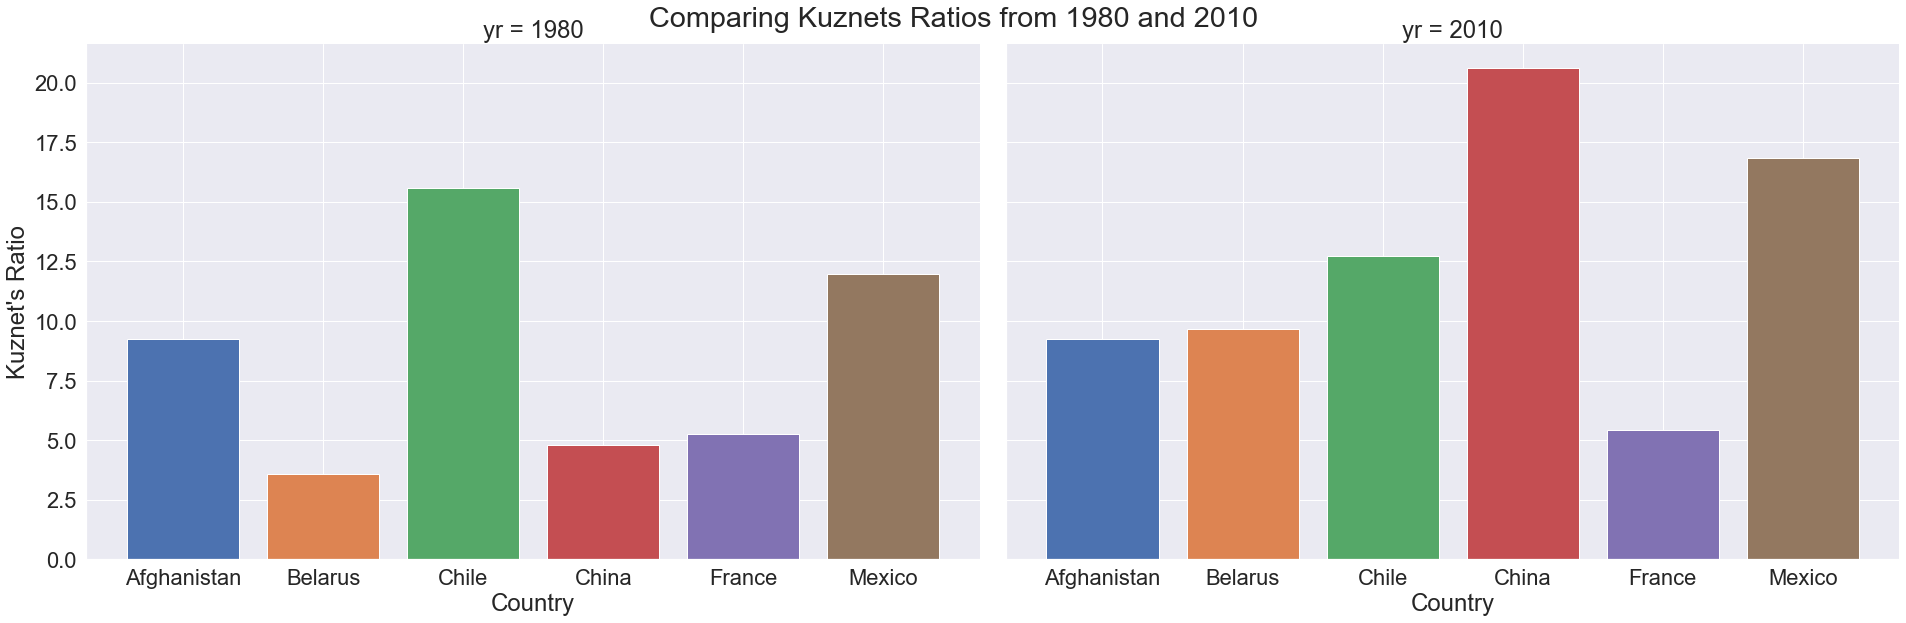

In [23]:
df10=df.loc[df.yr==2010,:]
countries= ['China', 'Afghanistan','Mexico', 'Belarus','Chile', 'France']
df10 = df10[df10.ctry.isin(countries)]
df10['share_top'] = (df10.dec_10*.1 + df10.dec_9*.1)/df10.mean_inc
df10['share_bot'] =(df10.dec_1*.1 + df10.dec_2*.1)/df10.mean_inc
df10['kuznets_ratio'] = df10.share_top/df10.share_bot
df10

q3 = q2

frames = [q3,df10]
q3 = pd.concat(frames)

sns.set(font_scale=2)
g = sns.FacetGrid(q3, col="yr", height = 9, aspect=1.5, hue = "ctry")
g = g.map(plt.bar, "ctry", 'kuznets_ratio')
g.set_axis_labels("Country", "Kuznet's Ratio")
g.fig.suptitle('Comparing Kuznets Ratios from 1980 and 2010')
g.savefig('kuznet_bar.png')




#### Question 4
##### Please create scatter plots of Kuznets ratios (y-axis) vs. mean income (x-axis) in 1980 and 2010.
Add a grid and title, and x and y axis labels.

Text(0.5, 0.98, 'Comparing Kuznets Ratios from 1980 and 2010')

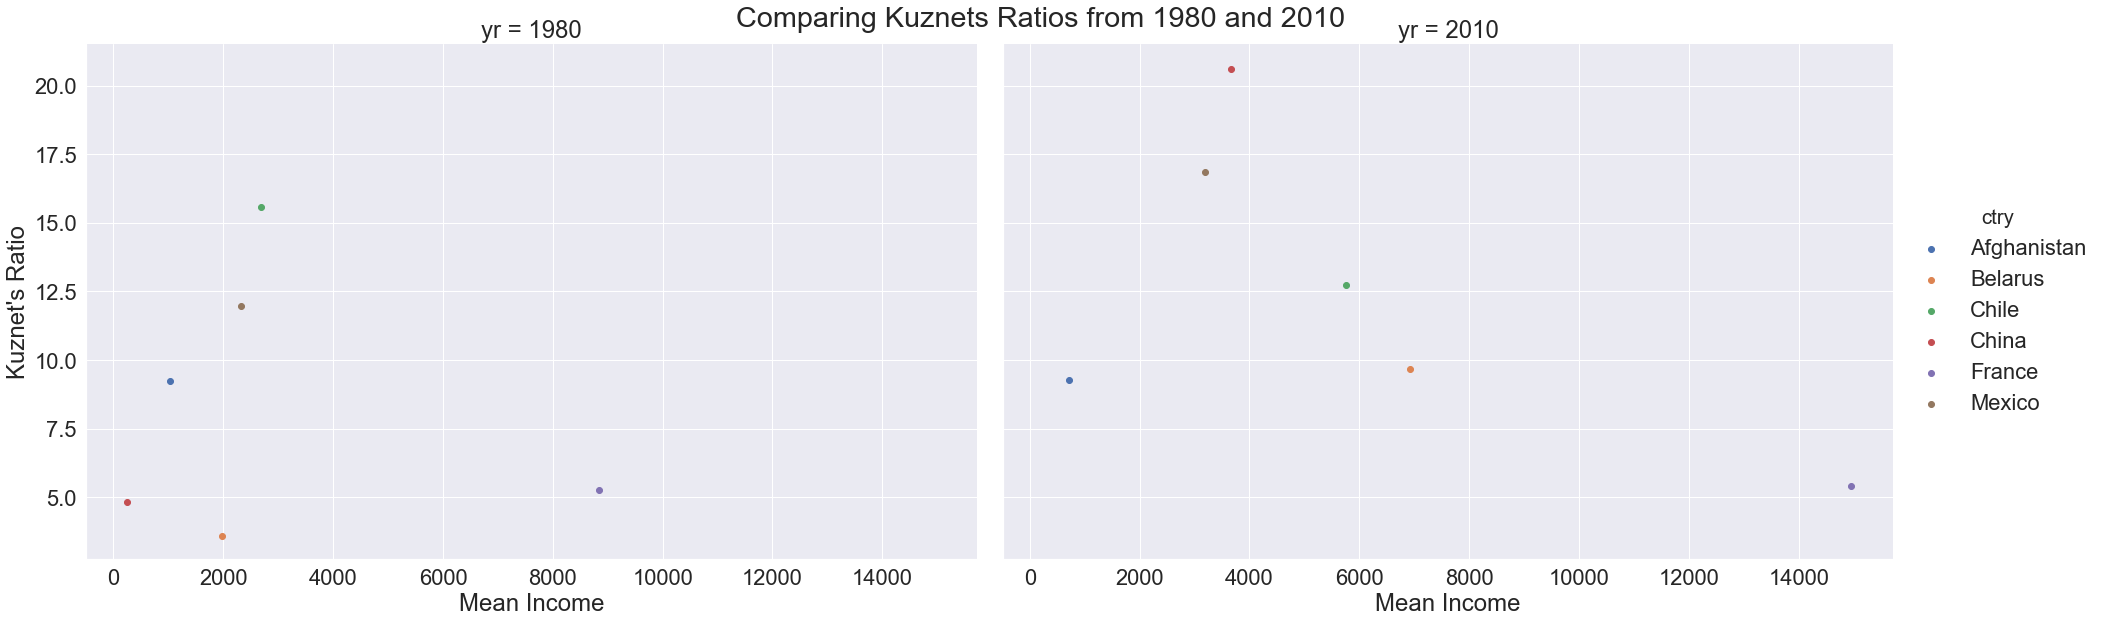

In [24]:
q4 = q3 
sns.set(font_scale=2)
g = sns.FacetGrid(q4, col="yr", height = 9, aspect=1.5, hue = "ctry")
g = g.map(plt.scatter, "mean_inc", 'kuznets_ratio')
g.set_axis_labels("Mean Income", "Kuznet's Ratio")
g.add_legend()
g.fig.suptitle('Comparing Kuznets Ratios from 1980 and 2010')

#### Question 5
##### Please create a single scatter plot of Kuznets ratios for all countries and all years in your sample. As before, please add a grid, a title, and labels to both x and y axis.

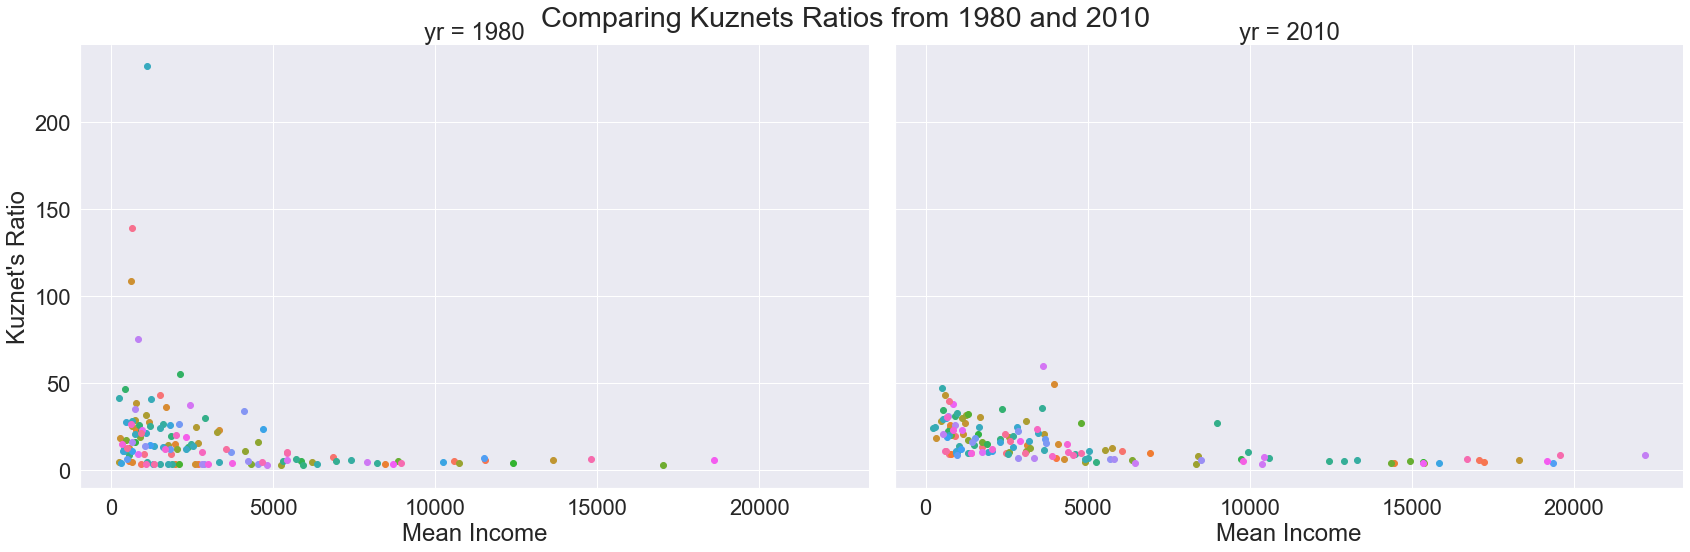

In [25]:
q5= df[(df['yr']== 1980) | (df['yr']==2010)]
q5['share_top'] = (q5.dec_10*.1 + q5.dec_9*.1)/q5.mean_inc
q5['share_bot'] =(q5.dec_1*.1 + q5.dec_2*.1)/q5.mean_inc
q5['kuznets_ratio'] = q5.share_top/q5.share_bot
q5

sns.set(font_scale=2)
g = sns.FacetGrid(q5, col="yr", height = 8, aspect=1.5, hue = "ctry")
g = g.map(plt.scatter, "mean_inc", 'kuznets_ratio')
g.set_axis_labels("Mean Income", "Kuznet's Ratio")
g.fig.suptitle('Comparing Kuznets Ratios from 1980 and 2010')
g.savefig('kuznet_scatter.png')

              ctry    yr  dec_1  dec_2  dec_3  dec_4  dec_5  dec_6  dec_7  \
627   Burkina Faso  1980     12     34     58     89    128    182    264   
2843    Mauritania  1980      7     31     72    131    216    342    539   
3830  Sierra Leone  1980     19     60    111    177    265    389    574   
4866        Zambia  1980      8     29     57     93    142    210    314   

      dec_8  dec_9  dec_10  mean_inc      pop  share_top  share_bot  \
627     404    712    4299       618  6822840   0.810841   0.007443   
2843    876   1597    7229      1104  1534085   0.799457   0.003442   
3830    883   1515    4431       842  3086406   0.706176   0.009382   
4866    490    867    4287       650  5929497   0.792923   0.005692   

      kuznets_ratio  
627      108.934783  
2843     232.263158  
3830      75.265823  
4866     139.297297  


Text(0.5, 0.98, 'Comparing Kuznets Ratios from 1980 and 2010')

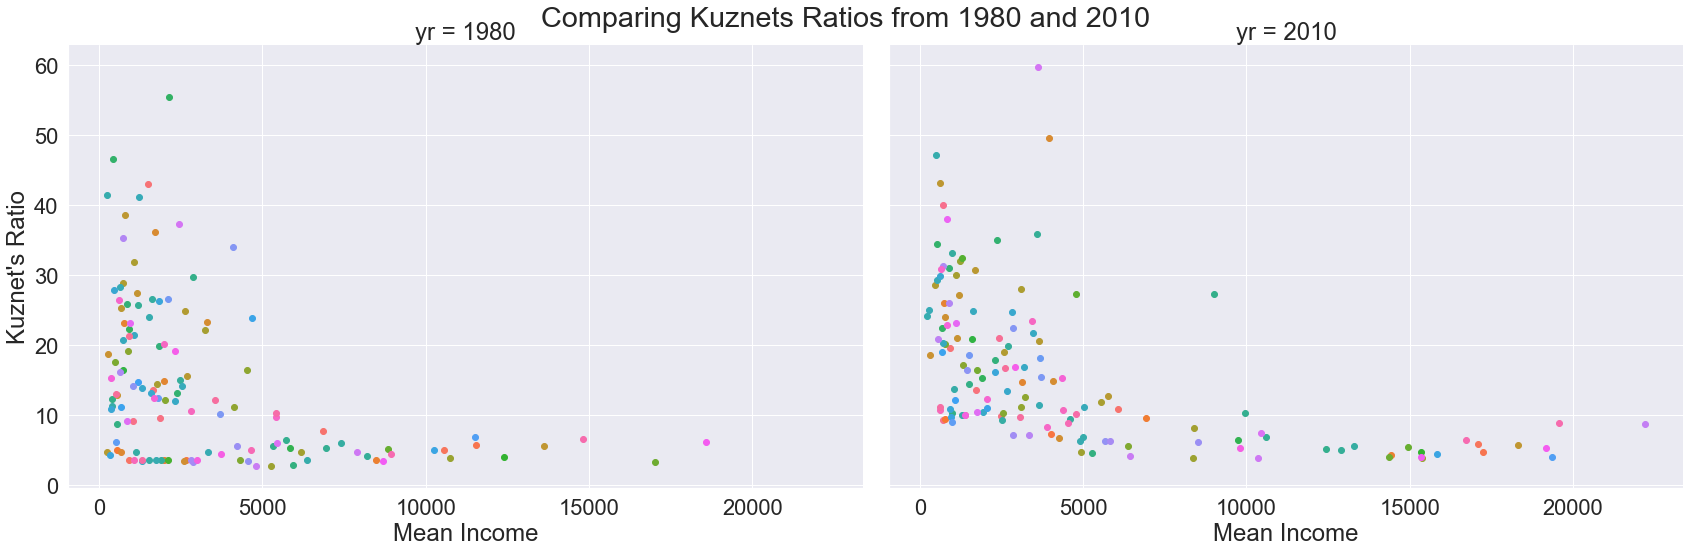

In [26]:
test= df[(df['yr']== 1980) | (df['yr']==2010)]
test['share_top'] = (test.dec_10*.1 + test.dec_9*.1)/test.mean_inc
test['share_bot'] =(test.dec_1*.1 + test.dec_2*.1)/test.mean_inc
test['kuznets_ratio'] = test.share_top/test.share_bot
test.head()
test.kuznets_ratio.max()
test2 = test.loc[test['kuznets_ratio'] < 60]
mauretantia = test.loc[test['kuznets_ratio'] > 60]
print(mauretantia)

sns.set(font_scale=2)
g = sns.FacetGrid(test2, col="yr", height = 8, aspect=1.5, hue = "ctry")
g = g.map(plt.scatter, "mean_inc", 'kuznets_ratio')
g.set_axis_labels("Mean Income", "Kuznet's Ratio")
g.fig.suptitle('Comparing Kuznets Ratios from 1980 and 2010')

#### Question 6. Does the Kuznet-curve still seem to hold? Explain your answer.

Both the scatterplots show the inverted U shape of the Kuznet's curve. However, I'm not sold on the validity of the theory. Although I'm not an expert, there is wide variation over the curve, suggesting that some countries can develop and maintain relative equality. 